#                     UC2OOP101 Object Oriented Programming
-------------------------------------------------------
#        Jason Leeworthy
-------------------------------------------------------

### Object Oriented Design and Implementation 
##### Part 1 of 2

In [17]:
# Importing required libraries
import statistics
import numpy as np
import math
import matplotlib as mpl
from collections import Counter
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

Class Imputer is required to perform the required tasks to convert the data with the requested format

In [24]:
# Class Imputer interface for all methods 
class Imputer:
    data = []

    def __init__(self, imputerparents, axis=0):
        self._imputerparents = imputerparents
        self.axis = axis

    def impute(self):
        self._imputerparents.impute()

    def fit(self, x):
        self.data = x

    def transform(self, data):
        return self._imputerparents.transform(self.data)

# Imputer Strategy Interface
This is the users interface 

In [25]:
# Imputer stratergy, 
class ImputerStrategy:
    """
    Client interface enforcing required
    methods to run the program
    """

    @abstractmethod
    def impute(self):
        pass

# Mean, Median and Mode Strategies
These following class's are strategies that performs the calculations and performs the transform and fit as required.

Other strategies can be added but they must follow the same format with regards to methods used, where they contain data or are just passed with nothing.

In [20]:
# Imputer strategy Mean
class Mean(ImputerStrategy):
    """
    Mean class, encompassing required methods
    to return mean values into NaN positions
    """
    
    # Start of methods, enforced in ImputerStratergy
    def impute(self):
        pass

    # Tranform data for Mean values
    def transform(self, data):
        value = []
        temp = []

        temp = self.__get_data(temp, data)   # extracting value by column in temp
        for i in range(len(temp)):  # calculating value from temp
            value.append(self.mean(temp[i]))
        self.__set_data(value, data)  # placing value in main data where is num
        return data

    # Mean value calculation (Rather than using numpy.mean)
    def mean(self, n_num):
        n = len(n_num)
        get_sum = sum(n_num)
        mean = get_sum / n
        return mean

    # Finding data, creating temp list before transforming 
    # data into new output
    def __get_data(self, temp, data):
        self.temp = temp
        self.data = data

        for x in range(len(data) - 1):
            for y in range(len(data[x])):
                if x == 0:
                    temp.append([])
                if True:
                    if math.isnan(data[x][y]) is not True:
                        temp[y - 1].append(data[x][y])
        return temp

    # Placing calculating value in main data where value is nan
    def __set_data(self, value, data):
        self.value = value
        self.data = data

        for x in range(len(data)):
            for y in range(len(data[x])):
                if True:
                    try:
                        if math.isnan(data[x][y]):
                            data[x][y] = value[y - 1]
                    except ValueError:
                        pass

In [21]:
# Class for Median calculations                    
class Median(ImputerStrategy, ABC):
    """
    Calculations for median strategy
    """
    def impute(self):
        pass

    # Transform for Median values
    def transform(self, data):
        value = []
        temp = []

        temp = self.__get_data(temp, data)  # extracting value by column in temp
        for i in range(len(temp)):  # calculating value from temp
            value.append(self.median(temp[i]))
        self.__set_data(value, data)  # placing value in main data where is num
        return data

    # Calculation for Medain value (Rather than using numpy.median)
    def median(self,n_num):
        n = len(n_num)
        n_num.sort()

        if n % 2 == 0:
            median1 = n_num[n // 2]
            median2 = n_num[n // 2 - 1]
            median = (median1 + median2) / 2
        else:
            median = n_num[n // 2]
        return median

    def __get_data(self, temp, data):
        self.temp = temp
        self.data = data

        for x in range(len(data) - 1):
            for y in range(len(data[x])):
                if x == 0:
                    temp.append([])
                if True:
                    if math.isnan(data[x][y]) is not True:
                        temp[y - 1].append(data[x][y])
        return temp

    # Placing calculating value in main data where value is nan
    def __set_data(self, value, data):
        self.value = value
        self.data = data

        for x in range(len(data)):
            for y in range(len(data[x])):
                if True:
                    try:
                        if math.isnan(data[x][y]):
                            data[x][y] = value[y - 1]
                    except ValueError:
                        pass

In [22]:
# Class Mode to return Mode values                    
class Mode(ImputerStrategy, ABC):
    """
    Calculations for Mode
    """
    
    def impute(self):
        pass

    # Transform for Mode values
    def transform(self, data):
        value = []
        temp = []

        temp = self.__get_data(temp, data)  # extracting value by column in temp
        for i in range(len(temp)):  # calculating value from temp
            value.append(statistics.mode(temp[i]))  # Using statistics for mode
        self.__set_data(value, data)  # placing value in main data where # is num

        return data

    def mode(self, n_num):
        n = len(n_num)

        data = Counter(n_num)
        get_mode = dict(data)
        mode = [k for k, v in get_mode.items() if v == max(list(data.values()))]

        if len(mode) == n:
            get_mode = 0
        else:
            get_mode = ''.join(map(str, mode))
        return get_mode

    def __get_data(self, temp, data):
        self.temp = temp
        self.data = data
        for x in range(len(data) - 1):
            for y in range(len(data[x])):
                if x == 0:
                    temp.append([])
                if True:
                    if math.isnan(data[x][y]) is not True:
                        temp[y - 1].append(data[x][y])
        return temp

    # Placing calculating value in main data where value is nan
    def __set_data(self, value, data):
        self.value = value
        self.data = data
        for x in range(len(data)):
            for y in range(len(data[x])):
                if True:
                    try:
                        if math.isnan(data[x][y]):
                            data[x][y] = value[y - 1]
                    except ValueError:
                        pass

# Main in the Dataset
The main dataset is that required to test the above strategies to ensure they perform as expected, this dataset and can be extended or reduced are required.

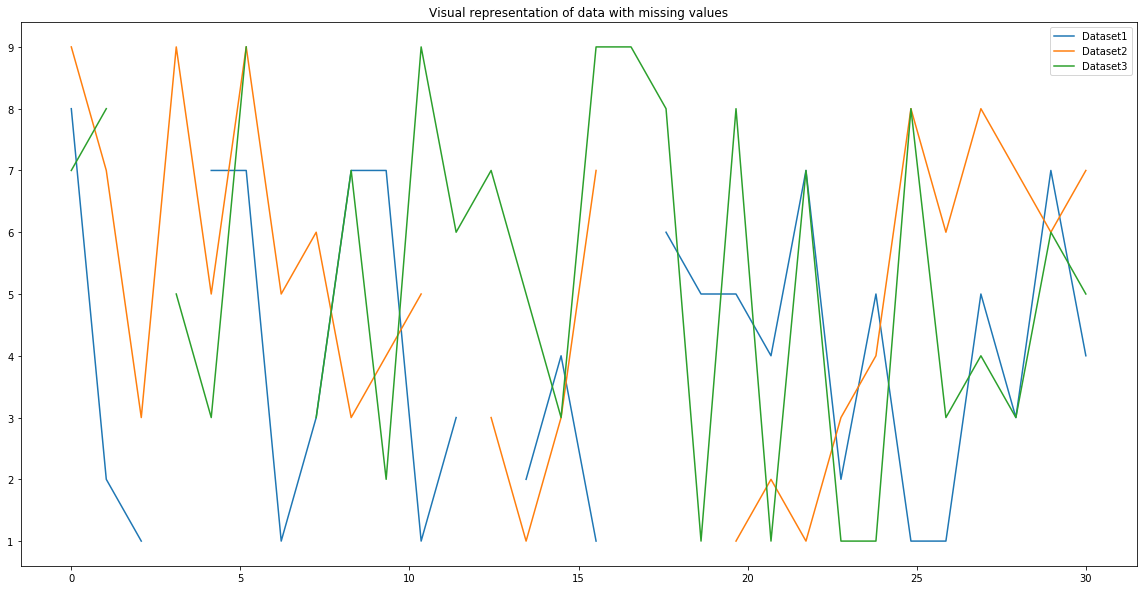

In [29]:
def main():
    """
    Creation of a random dataset with zeros spread throughout,
    these zeros are convert to NaN's for testing the code in which
    they will be replace (If required) by the requested values
    """
    # Creating a random dataset for testing
    data1 = np.random.randint(10, size=10)
    data2 = np.random.randint(10, size=10)
    data3 = np.random.randint(10, size=10)
    data4 = np.random.randint(10, size=10)
    data5 = np.random.randint(10, size=10)
    data6 = np.random.randint(10, size=10)
    data7 = np.random.randint(10, size=10)
    data8 = np.random.randint(10, size=10)
    data9 = np.random.randint(10, size=10)

    # Concatenating data to have a selection of zeros in the data
    dataset1 = np.concatenate((data1, data2, data3), axis=0)
    dataset2 = np.concatenate((data4, data5, data6), axis=0)
    dataset3 = np.concatenate((data7, data8, data9), axis=0)    

    # Ensuring data is an array and also a float avlue
    dataset1 = np.array(dataset1, dtype=float)
    dataset2 = np.array(dataset2, dtype=float)
    dataset3 = np.array(dataset3, dtype=float)

    # Replacing zeros with NaN
    dataset1[dataset1 == 0] = np.nan
    dataset2[dataset2 == 0] = np.nan
    dataset3[dataset3 == 0] = np.nan
    
    # Dataset1 line
    x = np.linspace(0, 30, 30)
    y1 = dataset1
    # Plot lines for Dataset1
    plt.plot(x, y1, label = "Dataset1")
    
    # Dataset2 line
    x = np.linspace(0, 30, 30)
    y2 = dataset2
    # Plot lines for Dataset2
    plt.plot(x, y2, label = "Dataset2")
    
    # Dataset3 line
    x= np.linspace(0, 30, 30)
    y3 = dataset3
    # Plot lines for Dataset3
    plt.plot(x, y3, label = "Dataset3")
    
    plt.title('Visual representation of data with missing values')
    plt.legend()
    plt.show()

    # Stacking the random values and NaN's into a final dataset
    datacomplete = np.column_stack((dataset1, dataset2, dataset3))
    return datacomplete

df = main()


# Graph
The above graph shows that the dataset is contains data with missing values.

In [30]:
# Create Objects of Mean, Median and Mode
mean = Mean()
median = Median()
mode = Mode()

In [34]:
# Various methods in which to call the required
# imputation
print("\nNumerical view of the data with the new values shown")
imputer = Imputer(mean, axis=0)
imputer.fit(df)
imputer.transform(df)



Numerical view of the data with the new values shown


array([[8.       , 9.       , 7.       ],
       [2.       , 7.       , 8.       ],
       [1.       , 3.       , 5.2962963],
       [3.88     , 9.       , 5.       ],
       [7.       , 5.       , 3.       ],
       [7.       , 9.       , 9.       ],
       [1.       , 5.       , 5.2962963],
       [3.       , 6.       , 3.       ],
       [7.       , 3.       , 7.       ],
       [7.       , 4.       , 2.       ],
       [1.       , 5.       , 9.       ],
       [3.       , 5.       , 6.       ],
       [3.88     , 3.       , 7.       ],
       [2.       , 1.       , 5.       ],
       [4.       , 3.       , 3.       ],
       [1.       , 7.       , 9.       ],
       [3.88     , 5.       , 9.       ],
       [6.       , 2.       , 8.       ],
       [5.       , 5.       , 1.       ],
       [5.       , 1.       , 8.       ],
       [4.       , 2.       , 1.       ],
       [7.       , 1.       , 7.       ],
       [2.       , 3.       , 1.       ],
       [5.       , 4.       , 1.  

# Reflection of Impute using a Strategy pattern

A strategy pattern provided the best method to perform the task assigned to replicate the SKLearn Impute code.

The Strategy pattern fosters multiple algorithms for problem-solving. In the example provided, we have three algorithms which can solve the missing data problem with the requested method, either a mean, median or mode solution and these can be selected runtime along with axis in which they are to be applied.

Example:
impute = Imputer(mean, axis = 0)
where:
impute is the variable assigned to the function.
Imputer is the Class to be called, which then references the ImputerStrategy.
mean is the method used to replace the missing values.
axis is the axis on which the imputation is to be applied.

Both the method and axis choice can be selected at runtime, allowing users to choose the best algorithm for the solution required.

Initially working on the code, it was thought to work backwards was the quickest way to complete the task. Knowing that it was simple to create a code to perform the Imputation without using Pattern Designs, then breaking it up into sections to see which parts are repeated and can be encapsulated. 
Breaking the sections up allows us to create a layer of abstraction between interfaces and implementations.

While using MatPlotLib, it was possible to create a graphical representation to show the missing data in the datasets; were all zeros were replaced with NaN. NaN refers to Not a Number, and therefore, we see gaps in the line of the graphical data representation.

When calling the impute code, the method and axis are applied; it is then ‘fit’ onto the dataset before finally being returned with the transformed result. While printing the output of the appropriate options for mean, median and mode show that all missing values replaced with their relevant value. Even though the get_data and set_data are repeatable functions, they were quite challenging to implement into separate code blocks without using multiple patterns to achieve it.

# Dealing with datasets that had none numerical values 

While reviewing dataset imports, with a focus on finding numerical values, a simple method to see only these in a dataset was found using numpy.
Numpy can look at Pandas DataFrames and select columns that have a specific data set. 

As an example, importing a csv dataset for motorcycles:

##### ** df = pd.read_csv('assignment_data.csv', low_memory = False)
##### ** df.dtypes # This returns datatypes of all columns
* Maunfacture          object
* Manufacture year    float64
* Owners age          float64
* Value               float64
* dtype: object

For finding columns with only numerical values that needed to be "cleaned" for data processing, using “select_dtypes” was an option.

##### ** df1 = df.select_dtypes(np.number) # Where np.number is the data type
##### ** df1.dtypes # returns the following
* Manufacture year    float64
* Owners age          float64
* Value               float64
* dtype: object
-------------------------------------------------------------------------------------------------------------------------------

Shown above is the result, and as can be seen only the columns with numerical values have been selected. Numpy is an excellent tool for working with databases or files where users do not know all the data types in the file and are only interested in working with specific data types.
--------------------------------------------------------------------------------------------------------------------------------------
Error from Mode using axis 0
StatisticsError Traceback (most recent call last) in 257 # imputebymean() 258 # imputebymedian() --> 259 imputebymode()
in imputebymode() 247 imputer = Imputer(mode, axis=0) 248 imputer.fit(df) --> 249 imputer = imputer.transform(df) 250 print(imputer) 251
in transform(self, data) 21 22 def transform(self, data): ---> 23 return self._imputerparents.transform(self.data) 24 25 # Imputer strategy
in transform(self, data) 153 temp = self.get_data(temp, data) # extracting value by column in temp 154 for i in range(len(temp)): # calculating value from temp --> 155 value.append(statistics.mode(temp[i])) # Using statistics for mode 156 self.set_data(value, data) # placing value in main data where # is num 157
~\Anaconda3\lib\statistics.py in mode(data) 504 elif table: 505 raise StatisticsError( --> 506 'no unique mode; found %d equally common values' % len(table) 507 ) 508 else:


StatisticsError: no unique mode; found 2 equally common values
--------------------------------------------------------------------------------------------------------------------------------------
A Simple Solution for this issue would be to implement the Counter library with the ‘most_common’ option or even simpler with Statistics mode method. However it was seen as a challenge that could prove to worthwhile trying to solve this problem, but with little success, it was decided to show this error as part of the reflection,  showing a sample of “lesson’s learnt”. Knowing there are easier solutions should not discourage people from using them. While wasting time in this section, it has amplified the need to share and reuse code as much as possible.




